# Author-Ashish Bangera

# GRIP MAY23:-THE SPARKS FOUNDATION

# Task 6 : Prediction of Iris Flower Species using Decision Tree Algorithm



#### Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [53]:
iris = pd.read_csv('Iris1.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [55]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
def splitkeyword(string):
    string = string.split('-')
    return string[1]

iris['Species'] = iris['Species'].apply(lambda x:splitkeyword(x))
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [57]:
### Creating a mapper for the Species,as for classification we need numerical data!==>

species_list = list(iris['Species'].unique())
mapper = {species_list[i]:i+1 for i in range(len(species_list))}
mapper

{'setosa': 1, 'versicolor': 2, 'virginica': 3}

In [58]:
iris['Class'] = iris['Species'].map(mapper)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [59]:
iris['Class'].value_counts()

Class
1    50
2    50
3    50
Name: count, dtype: int64

<Axes: ylabel='count'>

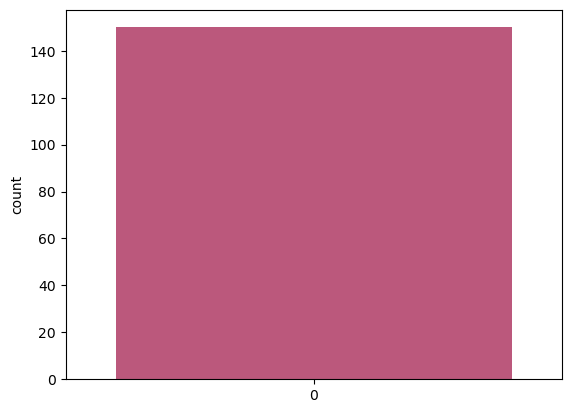

In [60]:
sn.countplot(iris['Class'],palette='plasma')

In [61]:
## dropping the id column

iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [62]:
# For now i will be dropping the species column,as we're about to start the model building
# once i get the predicted results,i will remap the Actual species and Predicted Species.

species = list(iris['Species'])
iris = iris.drop(['Species'],axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [63]:
# If we make an observation here,the Class Feature is in continous order,i.e the values are not jumbled
# First 50 rows are of class 1,next 50 are of class 2,and next 50 are of class 3,so its in an order we can say
# When we're working on Tree based Classifiers,they generally try to predict all the classes perfectly!,
# We cannot know how the model has performed,so a kind of Shuffling must be done,so that the model can get some unordered
# Data in its way and then we can get the correct intuation of this!,so i'll be using the sample(frac = 1) of pandas
# frac = 1 means we're trying to shuffle the data row wise.

iris = iris.sample(frac=1).reset_index()
iris = iris.drop(['index'],axis = 1)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,6.9,3.1,4.9,1.5,2
1,5.1,2.5,3.0,1.1,2
2,6.6,2.9,4.6,1.3,2
3,6.7,3.3,5.7,2.1,3
4,4.6,3.2,1.4,0.2,1


In [64]:
## renaming the column names

iris.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
iris.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,6.9,3.1,4.9,1.5,2
1,5.1,2.5,3.0,1.1,2
2,6.6,2.9,4.6,1.3,2


In [65]:
## Splitting the data into training and testing

test = iris['Class']
train = iris.drop(['Class'],axis = 1)
train.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.9,3.1,4.9,1.5
1,5.1,2.5,3.0,1.1


## Distribution Analysis

In [66]:
import scipy.stats as stats

In [67]:
def makeplots(col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(iris[col],color='salmon')
    
    plt.subplot(1,3,2)
    stats.probplot(iris[col],dist='norm',plot=plt)
    
    
    plt.subplot(1,3,3)
    sn.boxplot(iris[col],color='pink')
    plt.show()
    
    

 Statistical Plots for the Feature : SepalLength are shown ↓


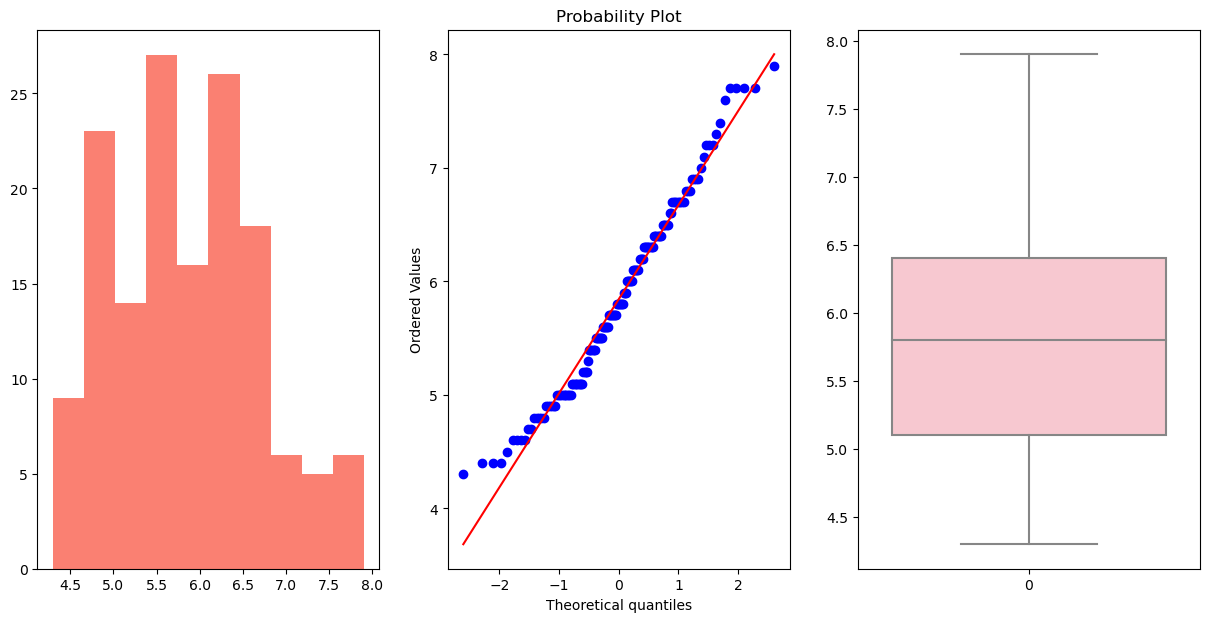

---------------------------------------------------------------------------
 Statistical Plots for the Feature : SepalWidth are shown ↓


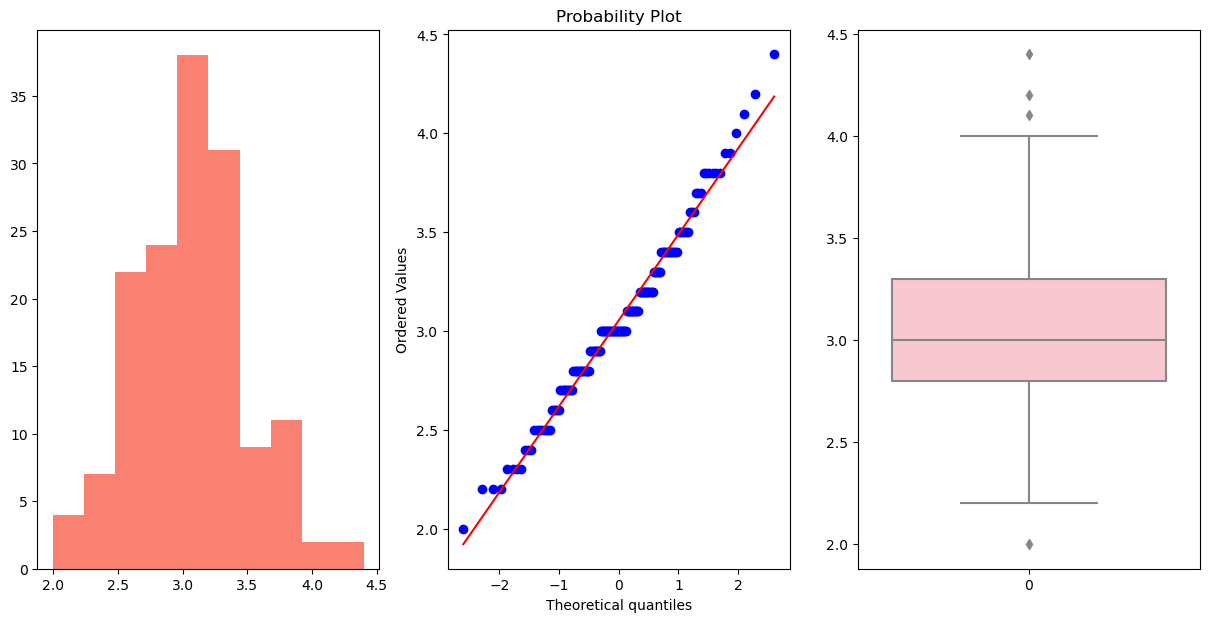

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalLength are shown ↓


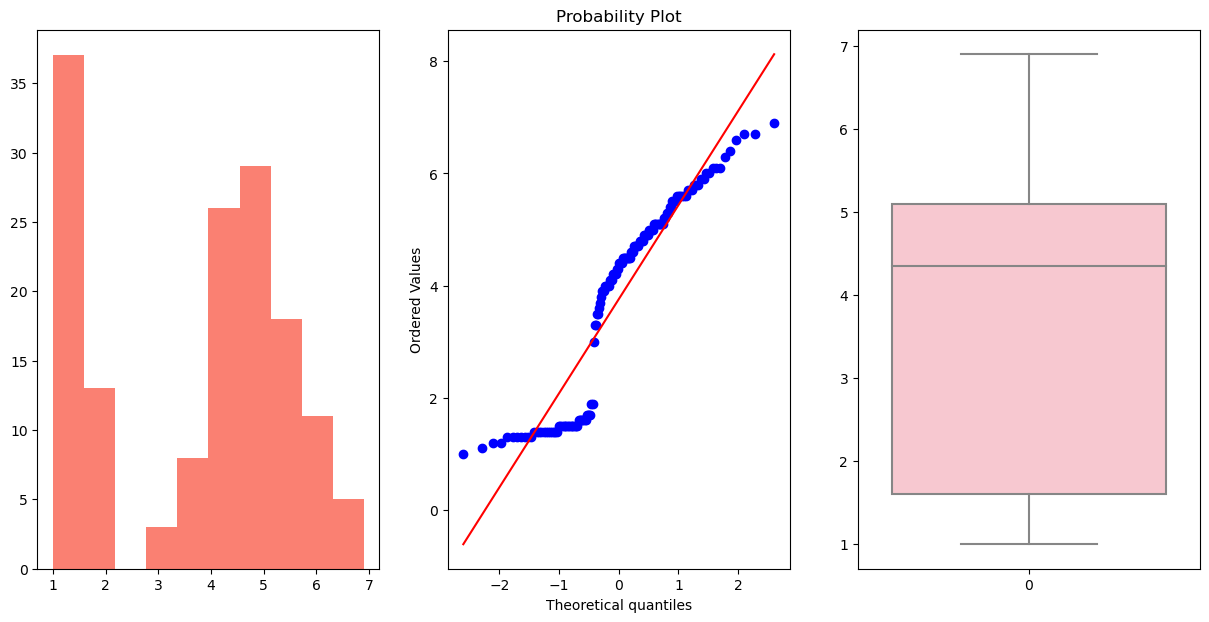

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalWidth are shown ↓


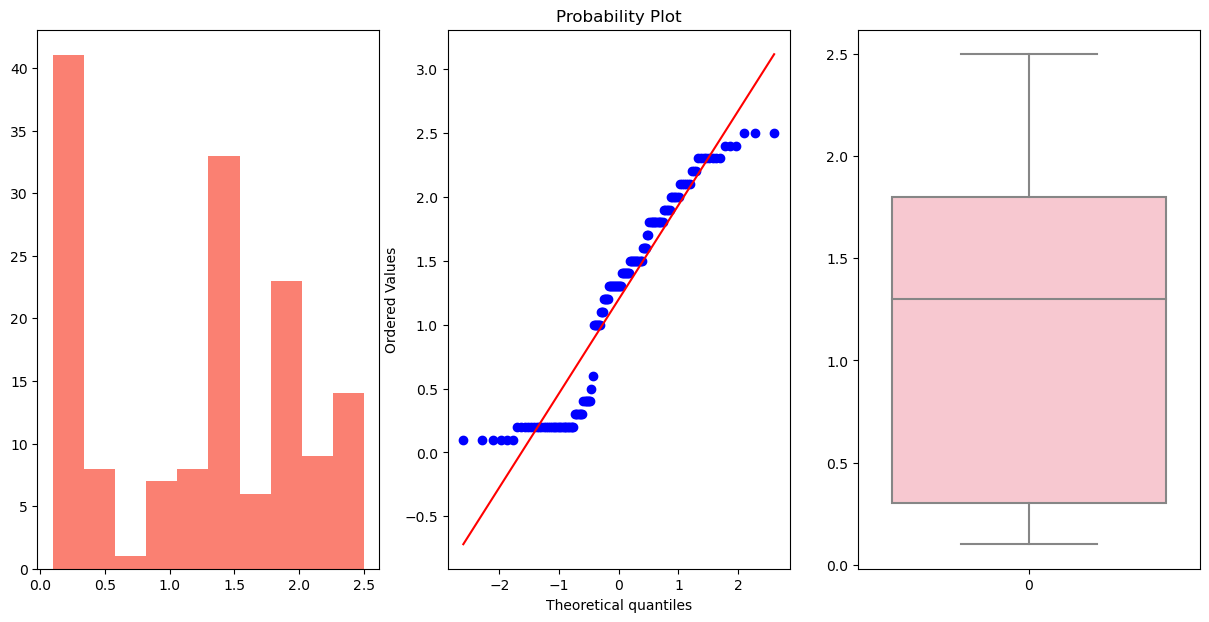

---------------------------------------------------------------------------


In [68]:
for i in train.columns:
    print(f' Statistical Plots for the Feature : {i} are shown ↓')
    makeplots(i)
    print("-"*75)

**From the above statistical plots we can observe that the Distribution of the feature "Petal Length" is not a perfect fit for the Gaussian Distribution,and also Petal Width,They are totally of some other distribution and not following the Gaussian Distribution,well as we are working with Tree Based Classifiers,Scaling the Data is not that important,as these classfiers split their nodes based on a certain `Decision` Logic,that is why they're said to be Decision Trees,lets first try brute force,if the results are not good,then we'll try to adjust the Distribution of the Features!**

In [69]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn import tree
from sklearn import metrics

In [70]:
# Splitting the data into train and test 80% training,20% validation

X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)
X_train.shape,X_test.shape

((120, 4), (30, 4))

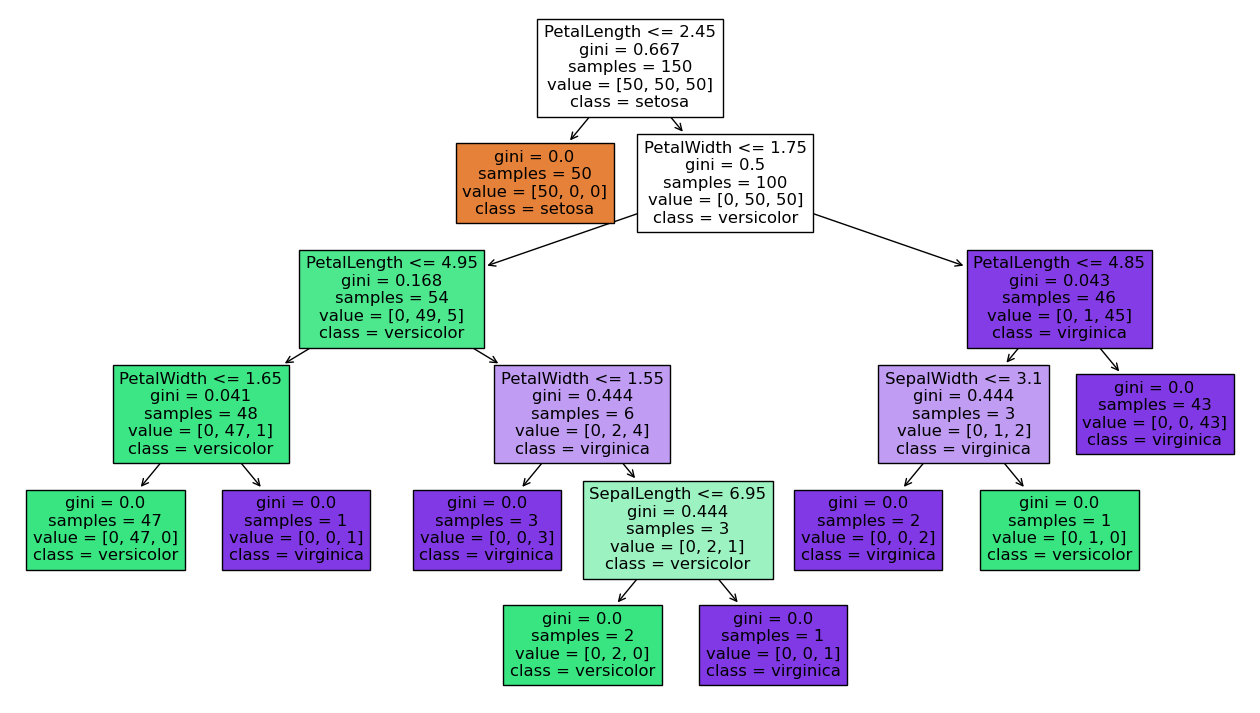

In [71]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train,test)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

**Initially at the root of the tree we have 150 samples,50 samples of each class,i have set the criterion of the `Decision Tree Classifier` as `gini`,so the first split in the tree is made on the basis of the `Petal Length`,as we can observe the root node of the tree,so based on `Petal Length<=2.45`,the classifier made 2 splits,the node on the left,which is having "[50,0,0]" which means all the `Setosa` samples have the `Petal Length <= 2.45`,next on the Righthand side we have [0,50,50] which means as we've sperated the Setosa category,we're left with `Versicolor and Virginica`,so based on the `Petal Length`,i.e `PetalLength<=4.95`,we have seperated the 2 classes as "VersiColor" and "Virginca",as shown,even they have some kind of impurities,as [0,49,5],in case of Versicolor,we have 49 samples of `Versicolor` and 5 samples of `Virginca`,so this is still impure,we can go on splitting the nodes uptil we get the perfect split,here darker the color of the node,more are the number of species of that class!,so this tree grows even more when more data is provided and basically the Decision Tree Classifier faces the problem of Overfitting as it tends to go till the leaf nodes,the one which are the most darkest in color,we can avoid this by Pruning the tree,for bigger datasets,this works..amazingly..and also we have to always try to prune the tree so that this will not face the Overfitting problem!**

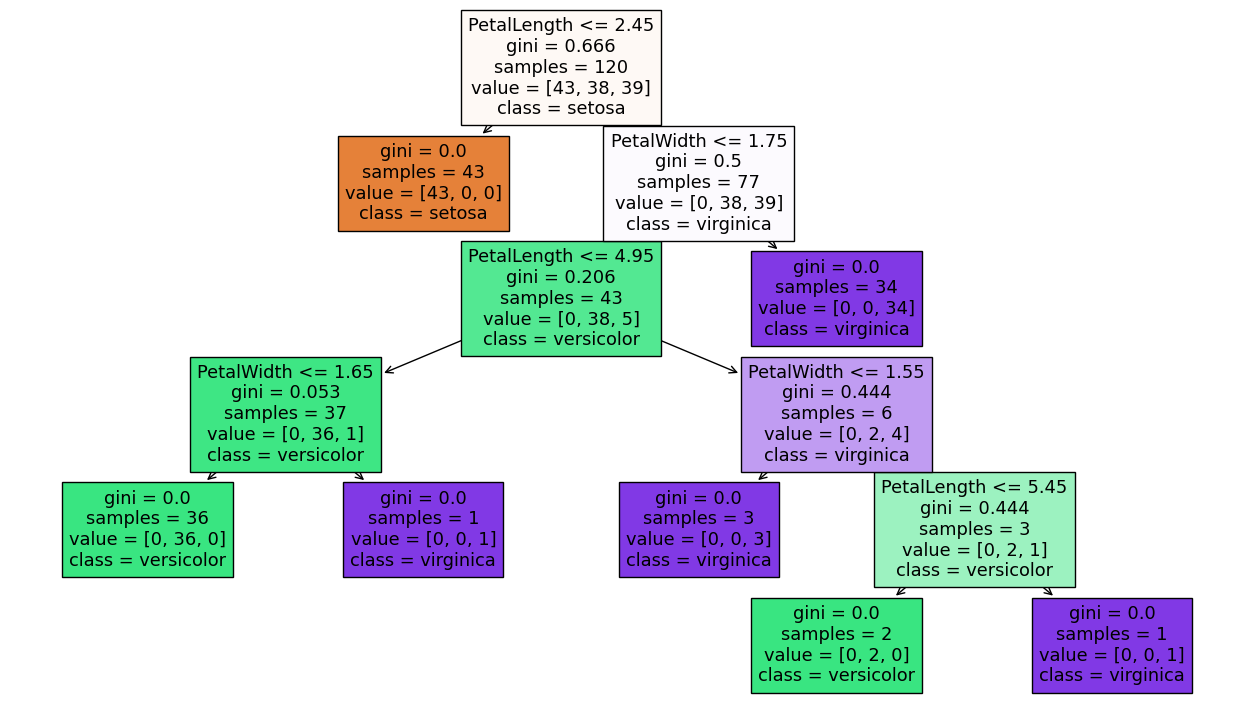

In [72]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

In [73]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [74]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

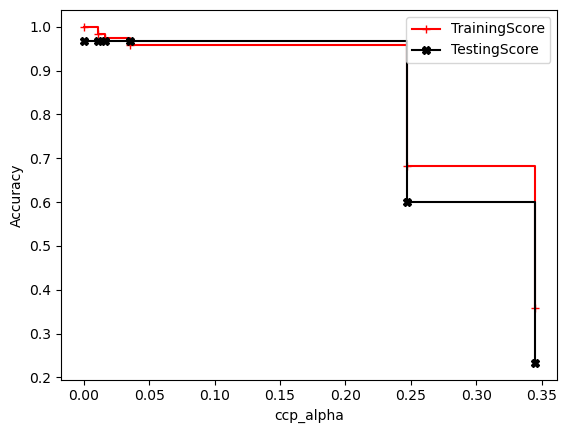

In [75]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]
plt.plot(ccp_alphas,train_score,marker = '+',label = 'TrainingScore',
        drawstyle = "steps-post",c= 'red')
plt.plot(ccp_alphas,test_score,marker = 'X',label = 'TestingScore',
        drawstyle = "steps-post",c = 'black')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**From the above graph we can observe that initially both the `training and testing` Score start from a very high value which is 1.0,then as we increase the value of `ccp_alpha`,the training Score starts to decrease,as well as testing score,but there is a point in the range of [0.00->0.05],where the testing score is at its peak and the training score is little bit less than that,for a good machine learning model,we must always try to maintain `low bias and low variance`,so we can find that point,somewhere between `0.00->0.05`,so we will use Hyperparameter Tuning and try to find the value of that `ccp_alpha` at which we attaing the concept of `low bias` and `low variance`**

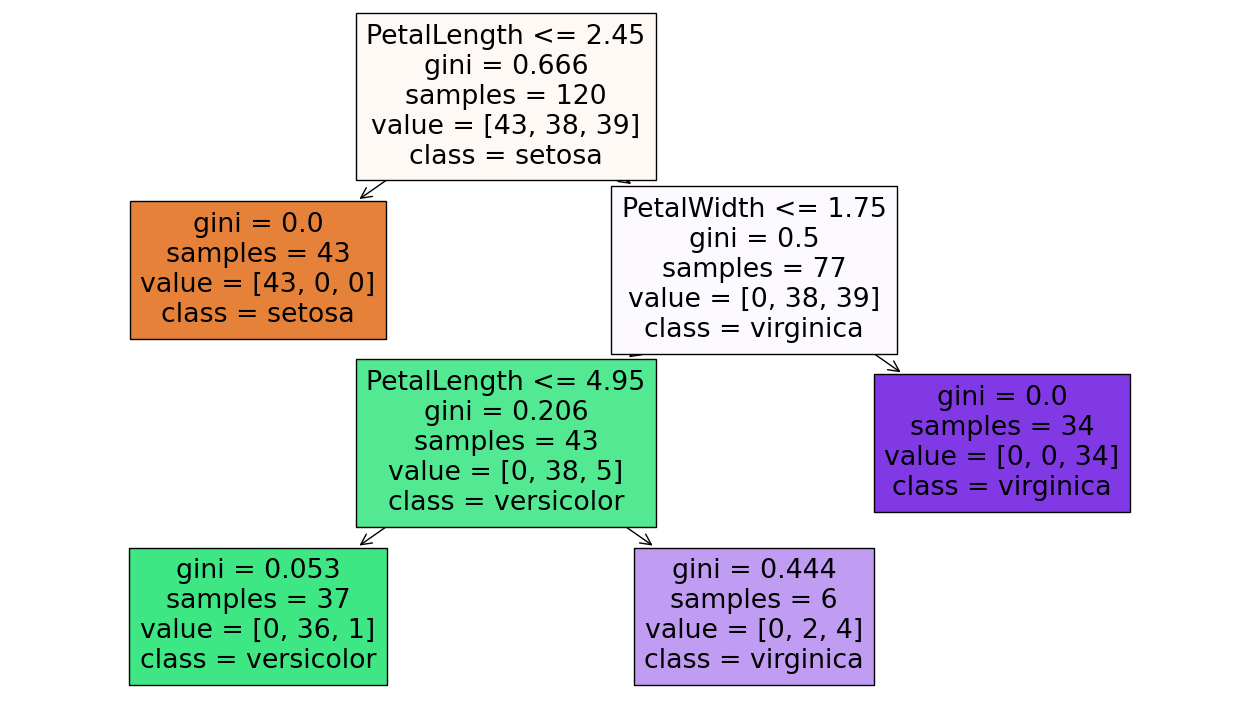

In [76]:
clf = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.025)
clf.fit(X_train,y_train)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

**Now let us try and visualise the decision boundaries of how sepal parameters and petal parameters alone can do the trick of overfitting,let us visualise their decision boundaries,and try and figure out that which is the essential parameter is it petal data or sepal data,lets check it out!**

In [77]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

In [78]:
sepal_data = iris[['SepalLength', 'SepalWidth']]
petal_data = iris[['PetalLength', 'PetalWidth']]
classes = iris['Class']

sp_length = sepal_data['SepalLength'].values
sp_width  = sepal_data['SepalWidth'].values
sp_array = np.c_[sp_length,sp_width]


pt_length = petal_data['PetalLength'].values
pt_width  = petal_data['PetalWidth'].values
pt_array = np.c_[pt_length,pt_width]

In [81]:
a = [round(x,3) for x in np.linspace(0,0.05,10)]
a

[0.0, 0.006, 0.011, 0.017, 0.022, 0.028, 0.033, 0.039, 0.044, 0.05]

### Decision Tree Classifier

**parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [84]:
params = {
        'criterion':["gini","entropy"],
        'splitter': ["best", "random"],
        'max_depth':[int(x) for x in np.linspace(1,20,5)],
        'min_samples_split':[2,4,6,8],
        'min_samples_leaf':[2,4,6,8],
        'ccp_alpha':[round(x,3) for x in np.linspace(0,0.05,10)]
    }
scores = []
clf = RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=params,cv = 5,n_iter=10,n_jobs=-1,
                        return_train_score=False)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.006, 0.011, 0.017,
                                                      0.022, 0.028, 0.033,
                                                      0.039, 0.044, 0.05],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15, 20],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'splitter': ['best', 'random']})

In [85]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.044, max_depth=15, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [86]:
clf.best_score_

0.9416666666666668

In [87]:
clf = DecisionTreeClassifier(ccp_alpha=0.028, criterion='entropy', max_depth=5,
                       min_samples_leaf=6)

clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.975

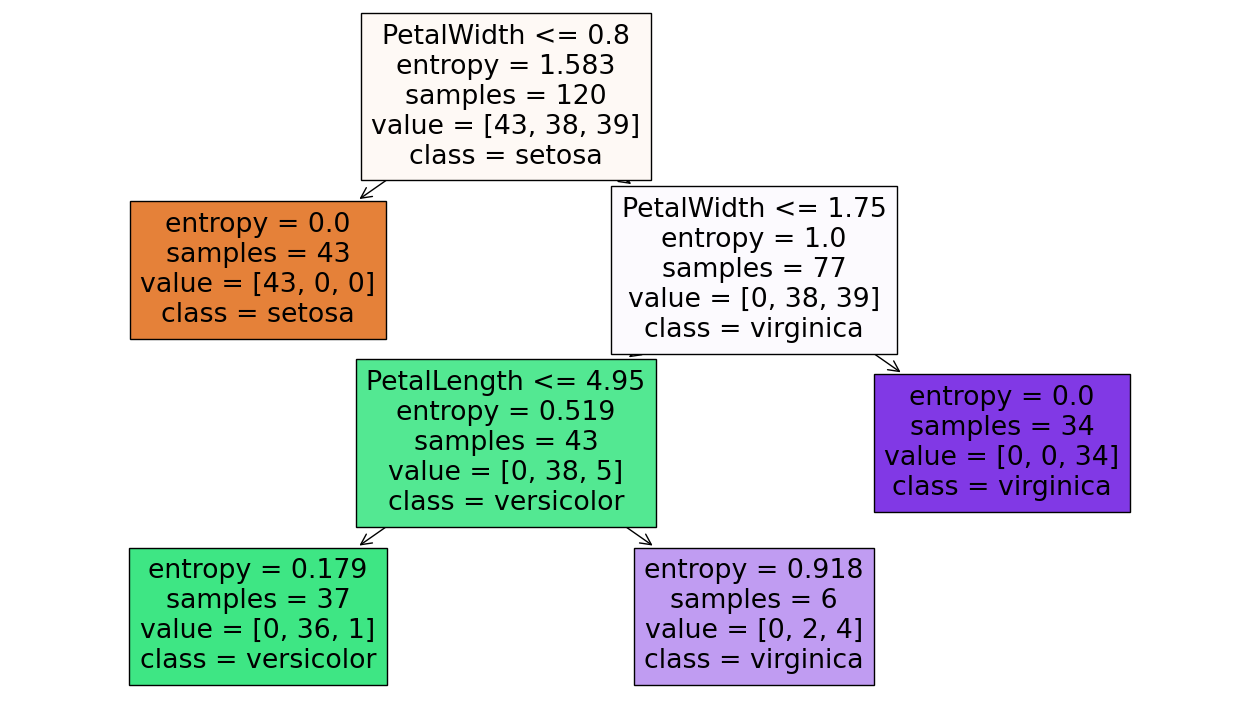

In [88]:
clf = DecisionTreeClassifier(ccp_alpha=0.028, criterion='entropy', max_depth=5,
                       min_samples_leaf=6)
clf.fit(X_train,y_train)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

In [89]:
clf.score(X_test,y_test)

0.9666666666666667

<Axes: >

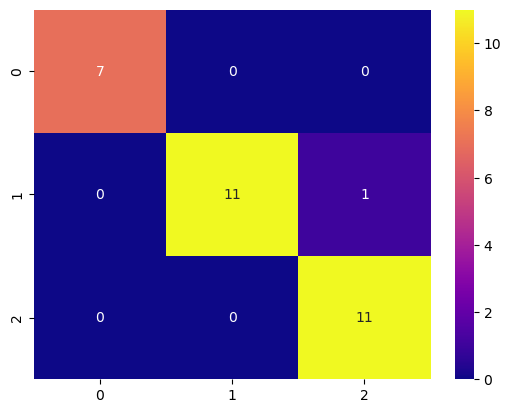

In [90]:
prediction = clf.predict(X_test)
cn = metrics.confusion_matrix(y_test,prediction)
sn.heatmap(cn,annot=True,cmap='plasma')

In [91]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.92      0.96        12
           3       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Testing on the Main Dataset now!!

In [92]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,6.9,3.1,4.9,1.5,2
1,5.1,2.5,3.0,1.1,2
2,6.6,2.9,4.6,1.3,2
3,6.7,3.3,5.7,2.1,3
4,4.6,3.2,1.4,0.2,1


In [93]:
prediction = []
train_test = np.array(train)
for i in range(len(train_test)):
    prediction.append(clf.predict([train_test[i]]))

In [94]:
prediction = np.array(prediction)
iris['Predicted'] = prediction
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Predicted
0,6.9,3.1,4.9,1.5,2,2
1,5.1,2.5,3.0,1.1,2,2
2,6.6,2.9,4.6,1.3,2,2
3,6.7,3.3,5.7,2.1,3,3
4,4.6,3.2,1.4,0.2,1,1


In [95]:
mapper = {1:'setosa',2:'versicolor',3:'virginica'}
iris['Actual_class'] = iris['Class'].map(mapper)
iris['Predicted_class'] = iris['Predicted'].map(mapper)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Predicted,Actual_class,Predicted_class
0,6.9,3.1,4.9,1.5,2,2,versicolor,versicolor
1,5.1,2.5,3.0,1.1,2,2,versicolor,versicolor
2,6.6,2.9,4.6,1.3,2,2,versicolor,versicolor
3,6.7,3.3,5.7,2.1,3,3,virginica,virginica
4,4.6,3.2,1.4,0.2,1,1,setosa,setosa


In [96]:
iris['Predicted_class'].value_counts()

Predicted_class
virginica     52
setosa        50
versicolor    48
Name: count, dtype: int64

<Axes: xlabel='Actual_class', ylabel='count'>

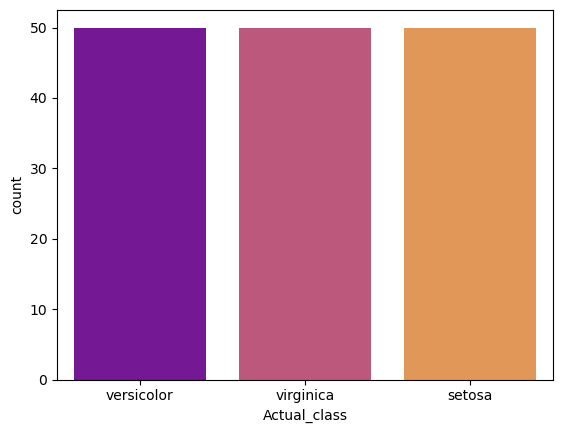

In [97]:
sn.countplot(data = iris,x = 'Actual_class',palette= 'plasma')

<Axes: xlabel='Predicted_class', ylabel='count'>

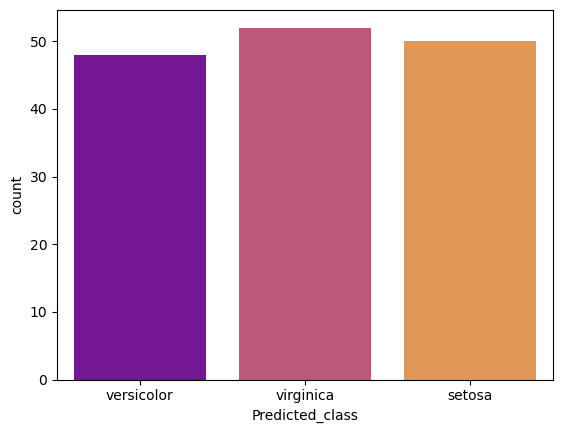

In [98]:
sn.countplot(data = iris,x = 'Predicted_class',palette= 'plasma')

<Axes: >

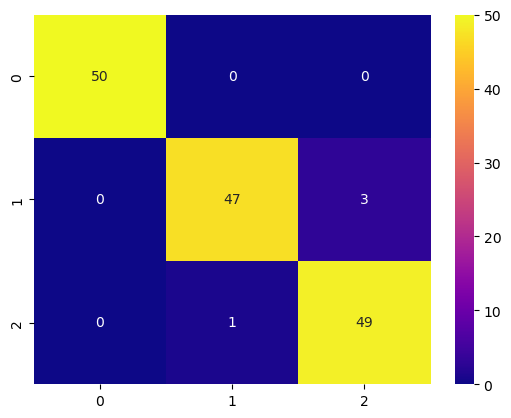

In [99]:
final_prediction = clf.predict(train)
cn = metrics.confusion_matrix(test,final_prediction)
sn.heatmap(cn,annot=True,cmap='plasma')

In [100]:
print(metrics.classification_report(test,final_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       0.98      0.94      0.96        50
           3       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



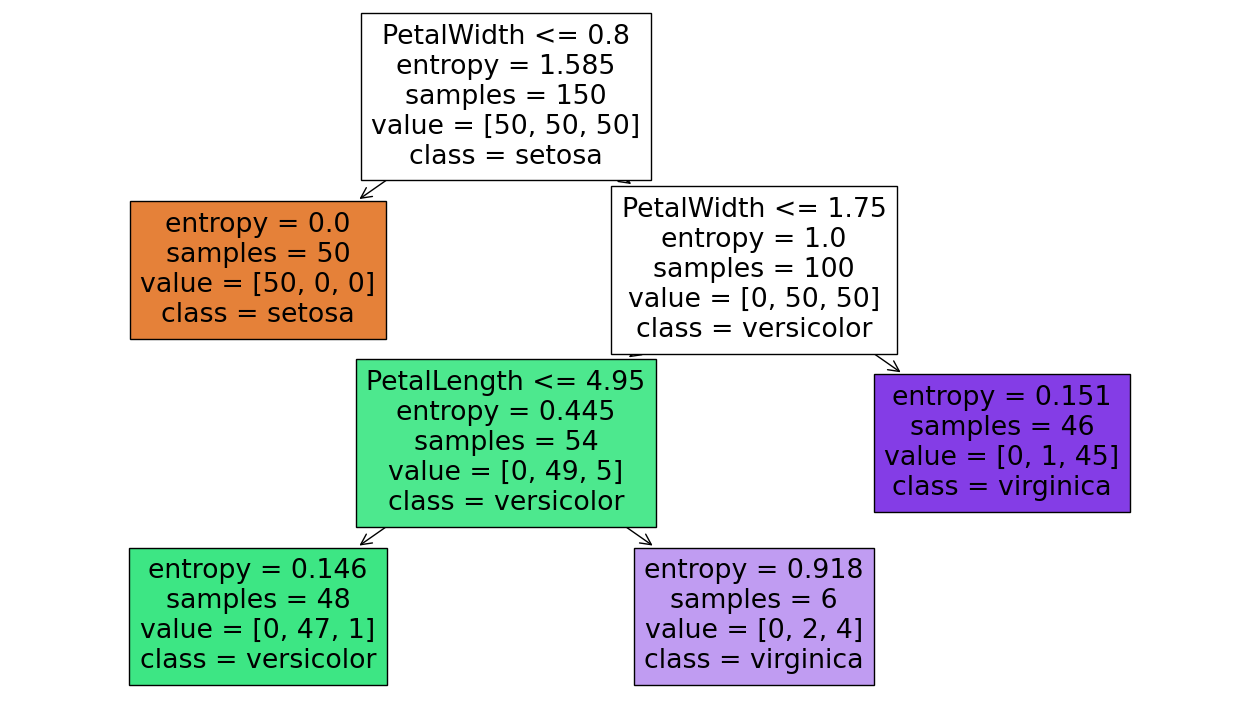

In [101]:
clf = DecisionTreeClassifier(ccp_alpha=0.028, criterion='entropy', max_depth=5,
                       min_samples_leaf=6)
clf.fit(train,test)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()